<a href="https://colab.research.google.com/github/chirag300/DataScience/blob/main/pep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df_test = pd.read_csv('/content/test.csv')
df_train = pd.read_csv('/content/train.csv')


In [ ]:
df_train.head()

In [ ]:
df_test.shape

(17100, 14)

edible-poisonous: edible=e, poisonous=p
cap-diameter: float number in cm
cap-shape: bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o
cap-color: brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k
does-bruise-bleed: bruises-or-bleeding=t,no=f
gill-attachment: adnate=a, adnexed=x, decurrent=d, free=e, sinuate=s, pores=p, none=f
gill-color: see cap-color + none=f
stem-height: float number in cm
stem-width: float number in mm
stem-color: see cap-color + none=f
has-ring: ring=t, none=f
ring-type: cobwebby=c, evanescent=e, flaring=r, grooved=g, large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f
habitat: grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d
Dependent variable
season: spring=s, summer=u, autumn=a, winter=w


In [ ]:
df_train.isnull().sum()

edible-poisonous           0
cap-diameter               0
cap-shape                  0
cap-color                  0
does-bruise-or-bleed       0
gill-attachment         4154
gill-color                 0
stem-height                0
stem-width                 0
stem-color                 0
has-ring                   0
ring-type                995
habitat                    0
season                     0
id                         0
dtype: int64

In [ ]:
df_train.shape

(25648, 15)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25648 entries, 0 to 25647
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edible-poisonous      25648 non-null  object 
 1   cap-diameter          25648 non-null  float64
 2   cap-shape             25648 non-null  object 
 3   cap-color             25648 non-null  object 
 4   does-bruise-or-bleed  25648 non-null  object 
 5   gill-attachment       21494 non-null  object 
 6   gill-color            25648 non-null  object 
 7   stem-height           25648 non-null  float64
 8   stem-width            25648 non-null  float64
 9   stem-color            25648 non-null  object 
 10  has-ring              25648 non-null  object 
 11  ring-type             24653 non-null  object 
 12  habitat               25648 non-null  object 
 13  season                25648 non-null  int64  
 14  id                    25648 non-null  int64  
dtypes: float64(3), int6

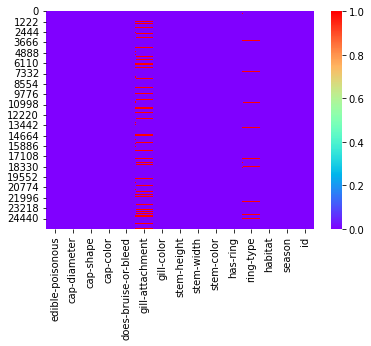

In [ ]:
sns.heatmap(df_train.isnull(), cmap = 'rainbow')

In [ ]:
df_train.describe()

,cap-diameter,stem-height,stem-width,season,id
count,25648.000000,25648.000000,25648.000000,25648.000000,25648.000000
mean,6.747371,6.606729,12.190709,2.056106,21354.140323
std,5.241724,3.405147,10.101215,1.100415,12354.918383
min,0.440000,0.000000,0.000000,1.000000,0.000000
25%,3.500000,4.660000,5.240000,1.000000,10665.750000
50%,5.890000,5.970000,10.195000,2.000000,21262.500000
75%,8.590000,7.750000,16.600000,3.000000,32068.250000
max,62.340000,33.920000,102.480000,4.000000,42746.000000


In [ ]:
df_train.dropna(axis = 0, inplace=True)

In [ ]:
df_train.isnull().sum()

edible-poisonous        0
cap-diameter            0
cap-shape               0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
id                      0
dtype: int64

In [ ]:
df_train.corr()['season'].sort_values(ascending=False)

season          1.000000
cap-diameter    0.062439
stem-width      0.030291
id              0.002383
stem-height    -0.021911
Name: season, dtype: float64

In [ ]:
df_train["season"].value_counts()

1    10178
3     7952
4     1715
2      797
Name: season, dtype: int64

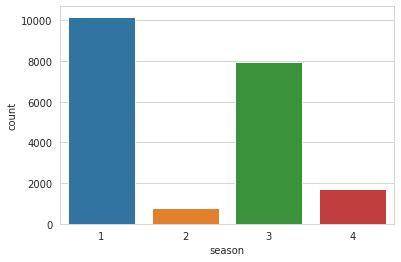

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'season', data = df_train)

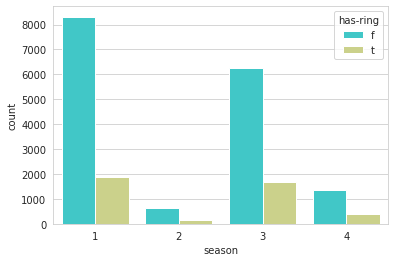

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x= 'season', hue = 'has-ring', data = df_train, palette = 'rainbow')

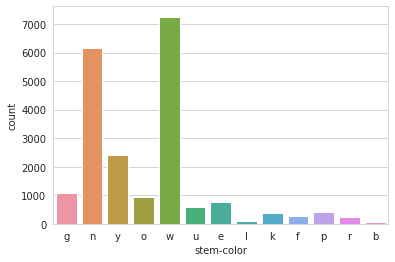

In [ ]:
sns.countplot(x = 'stem-color', data = df_train)

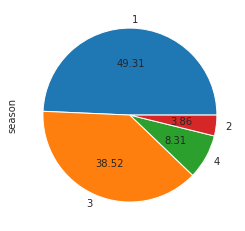

In [ ]:
df_train['season'].value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

In [ ]:
df_train.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,id
1,e,6.39,f,g,f,s,g,5.09,9.55,g,f,f,d,1,24274
2,e,4.54,x,n,f,p,n,4.97,10.42,n,f,f,d,3,13342
3,e,1.31,x,n,f,d,w,4.93,1.82,y,f,f,d,3,36055
5,p,5.14,x,y,f,a,y,5.96,8.26,o,f,f,g,3,10566
6,e,9.84,f,w,f,e,p,17.07,12.34,w,t,e,d,1,41754


In [ ]:
cols = ['edible-poisonous','cap-shape', 'cap-color','does-bruise-or-bleed','gill-attachment', 'gill-color', 'stem-color', 'has-ring','ring-type', 'habitat']
#
# Encode labels of multiple columns at once
#
df_train[cols] = df_train[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df_train.head()

In [ ]:
df_train.corr()

In [ ]:
df_train.corr()['season'].sort_values(ascending=False)

season                  1.000000
cap-diameter            0.062439
has-ring                0.037969
stem-width              0.030291
ring-type               0.002808
id                      0.002383
habitat                 0.002347
cap-color              -0.004807
cap-shape              -0.021351
stem-height            -0.021911
gill-color             -0.034913
stem-color             -0.038713
edible-poisonous       -0.041216
gill-attachment        -0.045625
does-bruise-or-bleed   -0.058549
Name: season, dtype: float64

(15.5, -0.5)

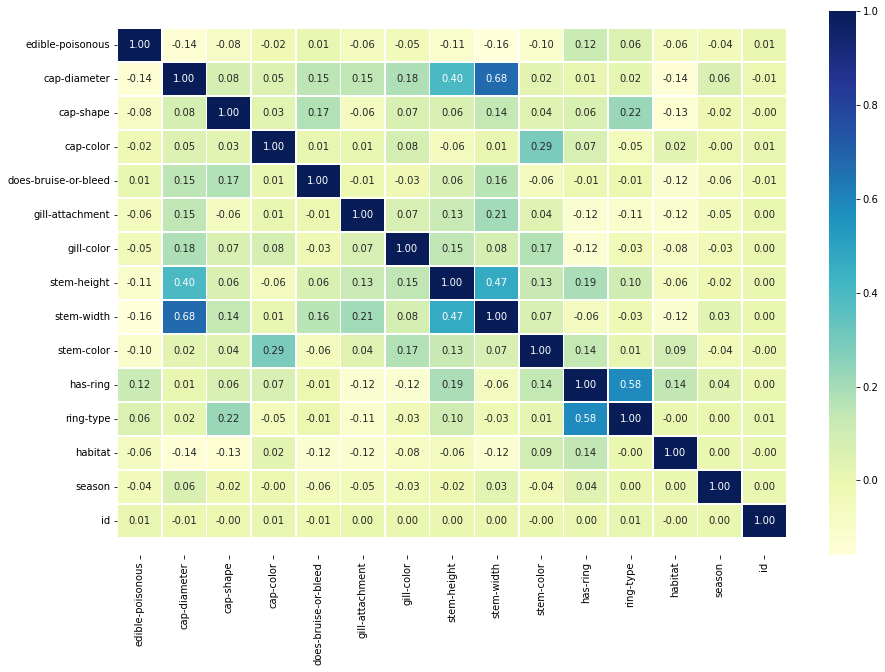

In [ ]:
corr_matrix = df_train.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
df_train = df_train.drop(['has-ring', 'habitat'], axis =1)

In [ ]:
df_train.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,ring-type,season,id
1,0,6.39,2,2,0,5,3,5.09,9.55,3,1,1,24274
2,0,4.54,6,5,0,4,5,4.97,10.42,6,1,3,13342
3,0,1.31,6,5,0,1,10,4.93,1.82,12,1,3,36055
5,1,5.14,6,11,0,0,11,5.96,8.26,7,1,3,10566
6,0,9.84,2,10,0,2,7,17.07,12.34,11,0,1,41754


In [ ]:

X = df_train.drop(['season'], axis=1)
y = df_train['season']


In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
from sklearn.model_selection import train_test_split 
xtrain, xtest , ytrain , ytest = train_test_split(X, y, test_size = 0.2)

In [ ]:
# from sklearn import svm
# model = svm.SVC(kernel = 'linear')
# model.fit(xtrain,ytrain)


from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
models = {"Decision Tree": DecisionTreeClassifier(),
          "SVM": svm.SVC(kernel='linear',C = 10),
          "Random Forest": RandomForestClassifier(),
          }

# Create a function to fit and score models


def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """

   
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train= xtrain,
                             X_test=xtest,
                             y_train=ytrain,
                             y_test=ytest)

acc_lr=model_scores['Decision Tree']
acc_rf=model_scores['Random Forest']
acc_knn=model_scores["SVM"]

In [ ]:
print("Decision Tree accuracy on test set: " + str(acc_lr))
print("SVM accuracy on test set: " + str(acc_knn))
print("Random Forest accuracy on test set: " + str(acc_rf))

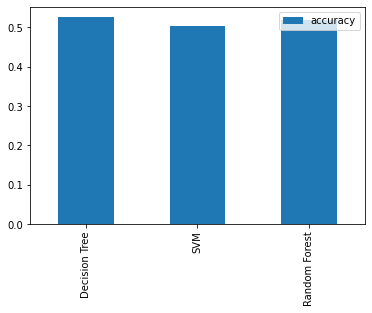

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

In [ ]:
df_test.head()


,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,id
0,p,15.78,x,g,t,d,b,5.10,25.27,r,f,f,d,18722
1,p,7.47,x,p,f,s,p,4.45,9.51,p,f,f,d,7025
2,p,6.95,x,p,f,NaN,w,4.50,13.89,y,f,f,d,9742
3,p,5.44,c,y,f,NaN,n,7.28,8.04,w,f,f,d,28607
4,p,9.46,x,n,f,a,w,10.16,28.41,w,f,f,d,41306


In [ ]:
cols = ['edible-poisonous','cap-shape', 'cap-color','does-bruise-or-bleed','gill-attachment', 'gill-color', 'stem-color', 'has-ring','ring-type', 'habitat']
#
# Encode labels of multiple columns at once
#
df_test[cols] = df_test[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df_test.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,id
0,1,15.78,6,2,1,1,0,5.10,25.27,9,0,1,0,18722
1,1,7.47,6,7,0,5,7,4.45,9.51,8,0,1,0,7025
2,1,6.95,6,7,0,7,10,4.50,13.89,12,0,1,0,9742
3,1,5.44,1,11,0,7,5,7.28,8.04,11,0,1,0,28607
4,1,9.46,6,5,0,0,10,10.16,28.41,11,0,1,0,41306


In [ ]:
x = models["Decision Tree"].predict(df_test)

In [ ]:
res = pd.DataFrame(x)

In [ ]:
res.shape

(17100, 1)

In [ ]:
res.index = df_test['id']

In [ ]:
from google.colab import files
res.to_csv('prediction.csv')         
files.download('prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>